## Librerias y carga de datos

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Seleccionar el archivo de Excel desde Google Drive
uploaded = files.upload()

# Obtener el nombre del archivo
filename = list(uploaded.keys())[0]

# Cargar el archivo de Excel usando Pandas
data = pd.read_excel(uploaded[filename])

# Imprimir las primeras 10 filas
print(data.head(10))


Saving infoclientebanca.xlsx to infoclientebanca (1).xlsx
   CLIENTE grupo_de_cliente  Numero_de_transacciones  \
0        1                A                        1   
1        2                A                        3   
2        3                A                        3   
3        4                A                       10   
4        5                A                        1   
5        6                A                        2   
6        7                A                        1   
7        8                A                        4   
8        9                A                        1   
9       10                A                        5   

   promedio_por_transaccion  transaccion_minima  transaccion_maxima  \
0                 459930.30            459930.3            459930.3   
1                 582666.70            350000.0            699000.0   
2                 616547.00            616547.0            616547.0   
3                 144467.10             2

## Analisis de datos

Forma de df

In [81]:
data.shape

(47871, 26)

Dataprep inicial: Antes de cualquier tratamiento

In [ ]:
!pip install dataprep

In [62]:
from dataprep.eda import create_report
report = create_report(data).show()

Output hidden; open in https://colab.research.google.com to view.

Tipo A: estas variables estan en una escala de 1 a mas de 6 millones.
"Numero_de_transacciones",                    
"promedio_por_transaccion",                 
"transaccion_minima",                         
"transaccion_maxima",                         
"desviacion_estandar_por_transaccion",

Tipo B: estan variables son porcentajes ya normalizados:
"porcentaje_visa_nacional",                   
"porcentaje_visa_internacional",              
"porcentaje_mastercard_nacional",             
"porcentaje_mastercard_internacional",        
"Porcentaje_otrafranquicia_nacional",         
"porcentaje_otrafranquicia_internacional",    
"porcentaje_nacional_total",                  
"porcentaje_internacional_total",             
"porcentaje_manana",                          
"porcentaje_tarde",                           
"porcentaje_noche",                           
"porcDOMINGO",                                
"porcLUNES",                                  
"porcMARTES",                                 
"porcMIERCOLES",                              
"porcJUEVES",                                 
"porcVIERNES",                                
"porcSABADO",

Tipo C: de 1 a 142
"Numero_de_transacciones",

Tipo D: Categoricas
"Sitio_consumo_masfrecuente",
"grupo_de_cliente"

Tipo E: CLIENTE


In [9]:
print(data.columns)

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente'],
      dtype='object')


Normalizacion de variables Tipo A y tipo C


In [10]:
from sklearn.preprocessing import MinMaxScaler

# posibles normalizaciones
def normalizar_minmax(data, feature_range=(0, 1)):
  scaler = MinMaxScaler(feature_range=feature_range)
  data_normalizada = scaler.fit_transform(data)
  return data_normalizada

def normalizar_rango_modificado(data):
    minimo = data.min()
    maximo = data.max()
    return (data - minimo) / (maximo - minimo) * (1 - 0.1) + 0.1

def normalizar_raiz_cuadrada(data):
    return (data ** 0.5) / ((data ** 0.5).max() - (data ** 0.5).min())

def normalizar_logaritmica(data):
    return np.log1p(data) / (np.log1p(data).max() - np.log1p(data).min())

# funcion principal de normalizacion
def normalize_data(data, required_columns, columns_rango1, columns_rango2):

  # Check for missing columns
  if not all(col in data.columns for col in required_columns):
    missing_columns = [col for col in required_columns if col not in data.columns]
    print(f"Error: Columns {missing_columns} not found in DataFrame.")
    return

  # Separate data for different ranges
  data_rango1 = data[columns_rango1]
  data_rango2 = data[columns_rango2]

  # Normalize data using appropriate methods
  data_scaled_rango1 = normalizar_minmax(data_rango1, feature_range=(0, 1))
  data_scaled_rango2 = normalizar_raiz_cuadrada(data_rango2)

  # Convert numpy arrays to pandas DataFrames
  data_scaled_rango1_df = pd.DataFrame(data_scaled_rango1, columns=columns_rango1)
  data_scaled_rango2_df = pd.DataFrame(data_scaled_rango2, columns=columns_rango2)

  # Replace original columns with normalized values
  for col in columns_rango1:
      data[col] = data_scaled_rango1_df[col]

  for col in columns_rango2:
      data[col] = data_scaled_rango2_df[col]

  return data

# Assuming 'data' is a Pandas DataFrame
dataNormalized = data.copy()

# Define required columns and column ranges
required_columns = [
    "Numero_de_transacciones",
    "promedio_por_transaccion",
    "transaccion_minima",
    "transaccion_maxima",
    "desviacion_estandar_por_transaccion",
]
columns_rango1 = [
    "promedio_por_transaccion",
    "transaccion_minima",
    "transaccion_maxima",
    "desviacion_estandar_por_transaccion",
]
columns_rango2 = ["Numero_de_transacciones"]

# Assuming 'data' is a Pandas DataFrame
dataNormalized = data.copy()

# Call the normalization function
dataNormalized = normalize_data(dataNormalized, required_columns, columns_rango1, columns_rango2)


In [11]:
dataNormalized

,CLIENTE,grupo_de_cliente,Numero_de_transacciones,promedio_por_transaccion,transaccion_minima,transaccion_maxima,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_visa_internacional,porcentaje_mastercard_nacional,...,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO,Sitio_consumo_masfrecuente
0,1,A,0.091605,0.073447,0.074799,0.041660,0.000000,0.000000,1.000000,0.0,...,0.00,1.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,CLINICAS - HOSPITALES
1,2,A,0.158665,0.093048,0.056921,0.063315,0.037181,1.000000,0.000000,0.0,...,1.00,0.0,0.000000,0.666667,0.0,0.000000,0.333333,0.000000,0.000000,MERCADEO DIRECTO - COMERCIANTES DE VENTAS TELE...
2,3,A,0.158665,0.098458,0.100269,0.055847,0.000000,1.000000,0.000000,0.0,...,0.00,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,"DROGUERIAS, FARMACIAS, TIENDAS NATURISTAS"
3,4,A,0.289682,0.023070,0.003253,0.029750,0.021532,0.000000,0.000000,1.0,...,0.60,0.0,0.000000,0.600000,0.2,0.000000,0.100000,0.000000,0.100000,ALMACEN POR DEPARTAMENTO CON SUPERMERCADO
4,5,A,0.091605,0.051383,0.052329,0.029145,0.000000,1.000000,0.000000,0.0,...,1.00,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,ALMACEN POR DEPARTAMENTO CON SUPERMERCADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47866,47867,A,0.091605,0.005206,0.005302,0.002953,0.000000,1.000000,0.000000,0.0,...,0.00,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,VENTA DE COMIDA RAPIDA
47867,47868,A,0.429668,0.038936,0.003122,0.036617,0.024974,0.090909,0.909091,0.0,...,0.25,0.6,0.090909,0.000000,0.0,0.090909,0.409091,0.272727,0.136364,COMPRAS EN INTERNET
47868,47869,A,0.204836,0.027602,0.013010,0.036232,0.023916,0.200000,0.600000,0.2,...,0.40,0.4,0.200000,0.000000,0.2,0.000000,0.200000,0.200000,0.200000,ALMACEN POR DEPARTAMENTO CON SUPERMERCADO
47869,47870,A,0.091605,0.014372,0.014637,0.008152,0.000000,1.000000,0.000000,0.0,...,1.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,ALMACENES DE VESTUARIO Y ACCESORIOS PARA TODA ...


## dataprep despues de normalizacion

In [91]:
from dataprep.eda import create_report
report = create_report(dataNormalized).show()

Output hidden; open in https://colab.research.google.com to view.

# Test de KMO


In [13]:
!pip install spicy

In [14]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=09c0be2e541a1b414a0605dab44d516e5b75a1147934d9880d5ae1a7dc0ceedf
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


Filtrar variables categoricas

In [15]:
from scipy.stats import bartlett
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# columnas categoricas o inutiles
columnas_seleccionadas = ["CLIENTE", "grupo_de_cliente", "Sitio_consumo_masfrecuente"]
dataNormalized.drop(columns=columnas_seleccionadas, inplace=True)

# Calculate the correlation matrix
correlation_matrix = dataNormalized.corr()

# Test KMO
kmo_all, kmo_model = calculate_kmo(correlation_matrix)
print(f'KMO: {kmo_model}')

KMO: 0.5009256463767434


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Data sin columnas categoricas o ids

In [16]:
dataNormalized

,Numero_de_transacciones,promedio_por_transaccion,transaccion_minima,transaccion_maxima,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_visa_internacional,porcentaje_mastercard_nacional,porcentaje_mastercard_internacional,Porcentaje_otrafranquicia_nacional,...,porcentaje_manana,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO
0,0.091605,0.073447,0.074799,0.041660,0.000000,0.000000,1.000000,0.0,0.0,0.0,...,0.00,0.00,1.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
1,0.158665,0.093048,0.056921,0.063315,0.037181,1.000000,0.000000,0.0,0.0,0.0,...,0.00,1.00,0.0,0.000000,0.666667,0.0,0.000000,0.333333,0.000000,0.000000
2,0.158665,0.098458,0.100269,0.055847,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,1.00,0.00,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
3,0.289682,0.023070,0.003253,0.029750,0.021532,0.000000,0.000000,1.0,0.0,0.0,...,0.40,0.60,0.0,0.000000,0.600000,0.2,0.000000,0.100000,0.000000,0.100000
4,0.091605,0.051383,0.052329,0.029145,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,0.00,1.00,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47866,0.091605,0.005206,0.005302,0.002953,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,1.00,0.00,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
47867,0.429668,0.038936,0.003122,0.036617,0.024974,0.090909,0.909091,0.0,0.0,0.0,...,0.15,0.25,0.6,0.090909,0.000000,0.0,0.090909,0.409091,0.272727,0.136364
47868,0.204836,0.027602,0.013010,0.036232,0.023916,0.200000,0.600000,0.2,0.0,0.0,...,0.20,0.40,0.4,0.200000,0.000000,0.2,0.000000,0.200000,0.200000,0.200000
47869,0.091605,0.014372,0.014637,0.008152,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,0.00,1.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000


## Resultados:
KMO: 0.5009256463767434

# PCA

Gráfico de sedimentación

[0.58817534 0.6792484  0.75236103 0.80112051]


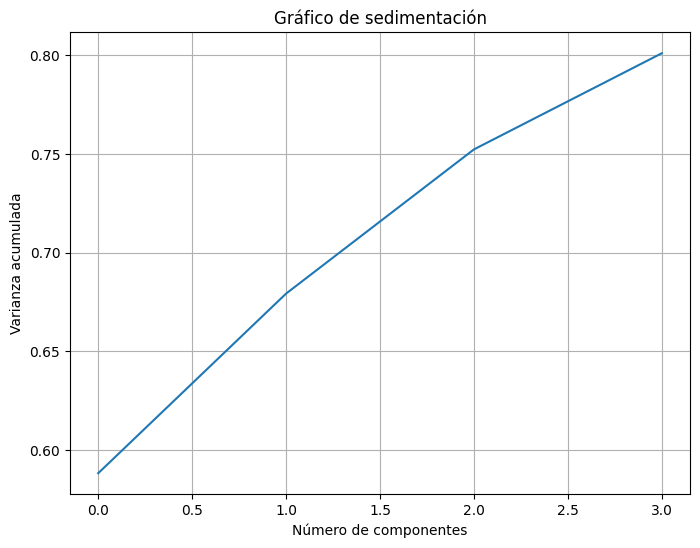

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Aplicación de PCA
n_components = 4
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(dataNormalized)

# Variabilidad explicada
explained_variance = pca.explained_variance_ratio_
print(np.cumsum(explained_variance))  # Variabilidad acumulada

# Gráfico de sedimentación para visualizar la variabilidad explicada por cada componente
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Gráfico de sedimentación')
plt.grid(True)
plt.show()

In [ ]:
!pip install seaborn

Mapa de calor de las cargas factoriales

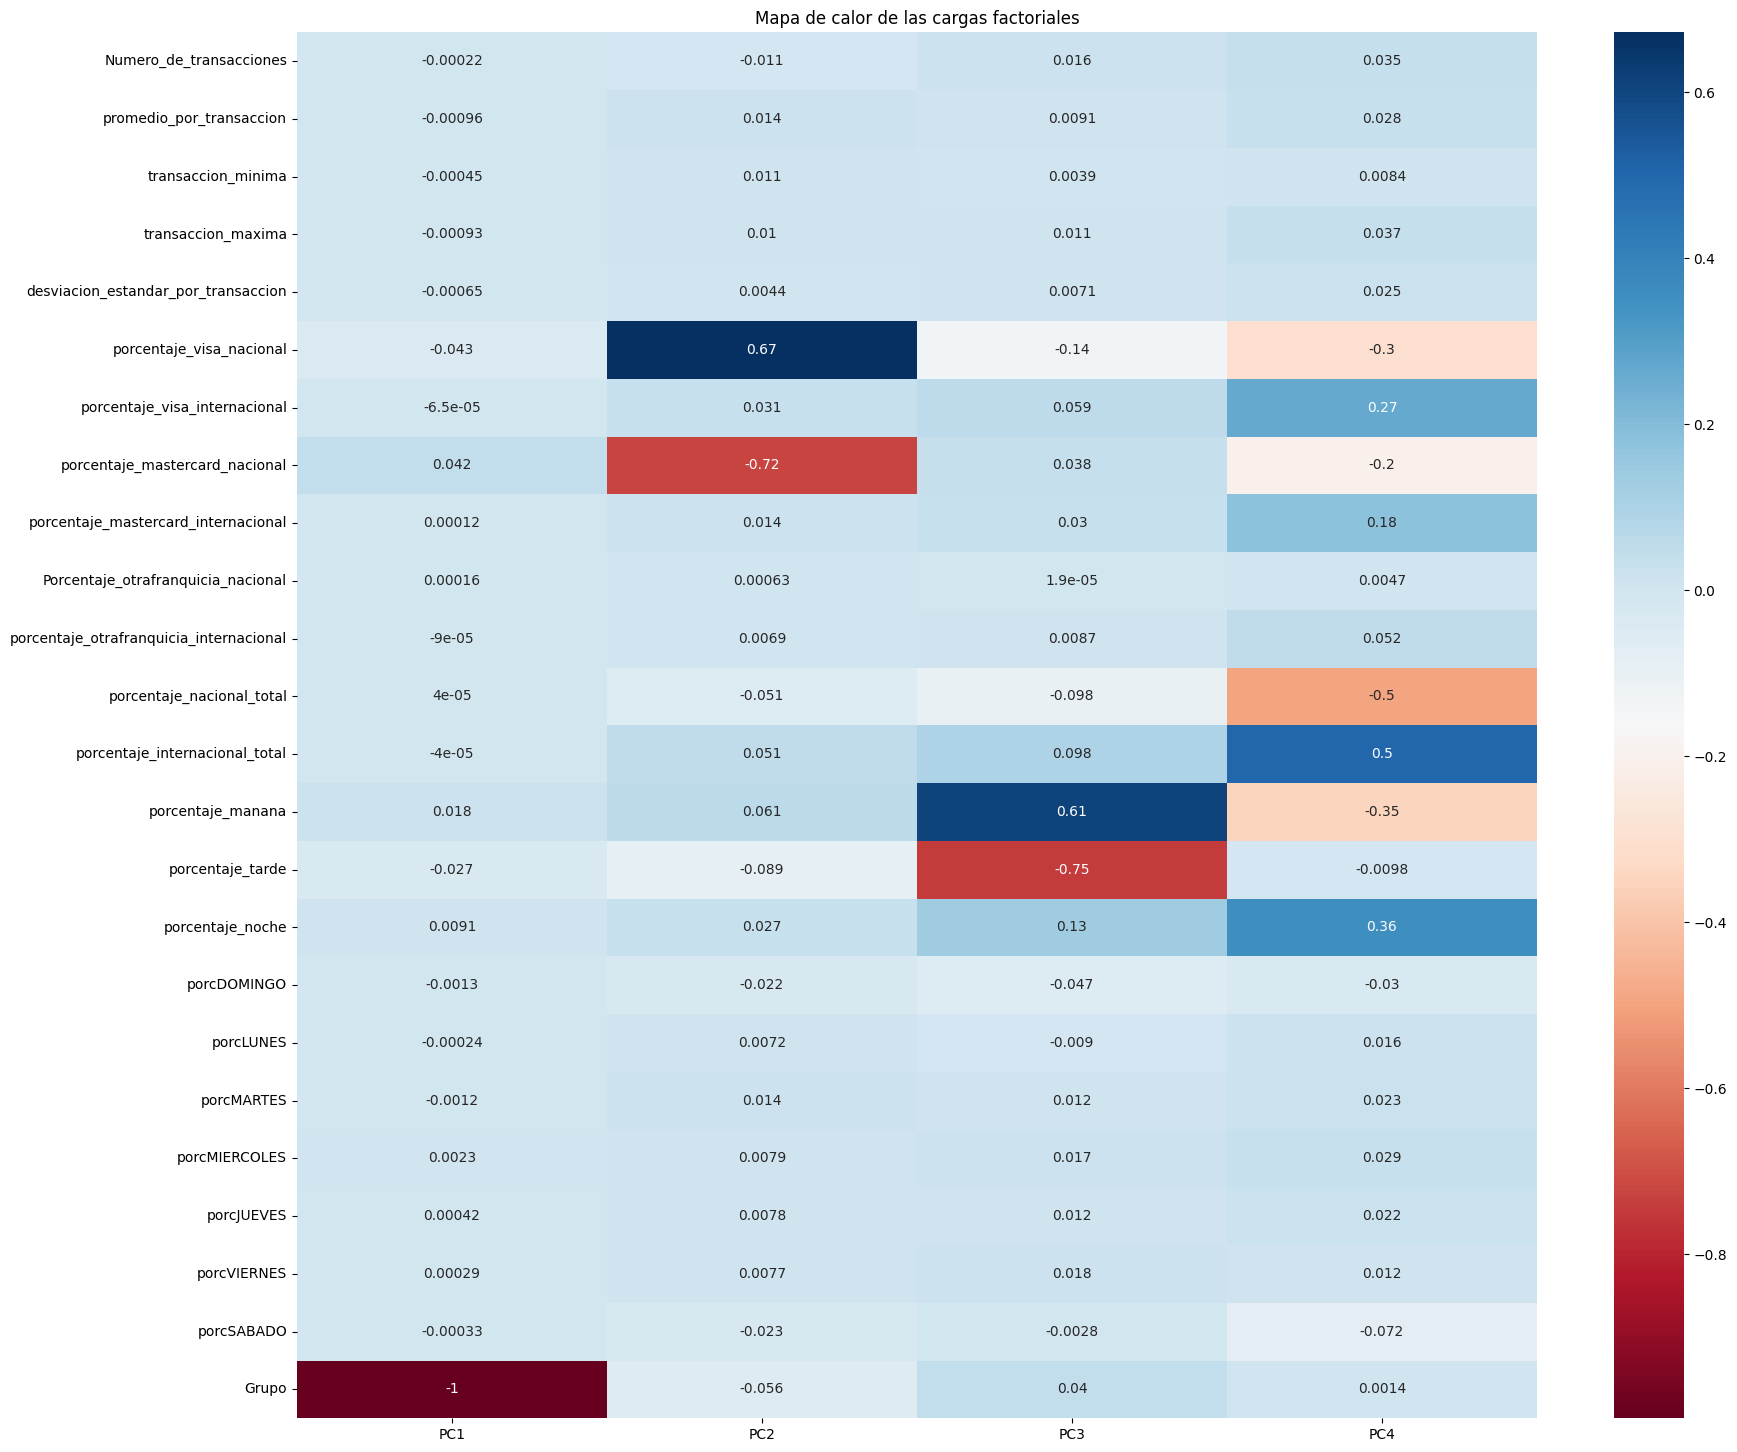

In [40]:
import seaborn as sns

# Extrae solo las primeras cuatro componentes principales
loadings = pd.DataFrame(pca.components_[:4].T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=dataNormalized.columns)

# Crea el gráfico de calor
plt.figure(figsize=(20, 18))
sns.heatmap(loadings, annot=True, cmap="RdBu")
plt.title('Mapa de calor de las cargas factoriales')
plt.show()

Rotacion Varimax

In [41]:
from factor_analyzer import FactorAnalyzer

# Rotación de ejes para facilitar la interpretación
fa = FactorAnalyzer(rotation="varimax", n_factors=4)
fa.fit(StandardScaler().fit_transform(dataNormalized))
loadings_rotated = pd.DataFrame(fa.loadings_, columns=['RC1', 'RC2', 'RC3', 'RC4'], index=dataNormalized.columns)
print('Cargas factoriales después de la rotación:')
print(loadings_rotated)


Cargas factoriales después de la rotación:
                                              RC1       RC2       RC3  \
Numero_de_transacciones                  0.160083 -0.022724 -0.074378   
promedio_por_transaccion                -0.043765  1.007283  0.000122   
transaccion_minima                      -0.092149  0.678854  0.028081   
transaccion_maxima                       0.084342  0.909281 -0.033719   
desviacion_estandar_por_transaccion      0.141707  0.483261 -0.032347   
porcentaje_visa_nacional                -0.274868  0.035276  0.935009   
porcentaje_visa_internacional            0.623696  0.119658  0.040505   
porcentaje_mastercard_nacional          -0.265271 -0.122245 -0.954351   
porcentaje_mastercard_internacional      0.504344  0.110070  0.004803   
Porcentaje_otrafranquicia_nacional      -0.016499 -0.011612 -0.000052   
porcentaje_otrafranquicia_internacional  0.256522  0.046934  0.024903   
porcentaje_nacional_total               -1.002692 -0.168132 -0.045714   
porcenta

# Clusterizacion: K-Means sobre los PCA



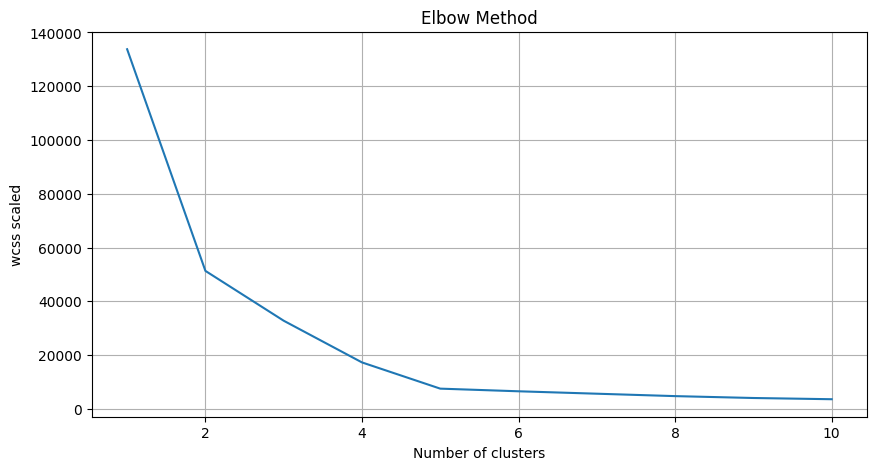

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar el método del codo para encontrar el número óptimo de clusters
wcss_scaled = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(principal_components)
    wcss_scaled.append(kmeans.inertia_)

# Graficar los resultados para observar el 'codo'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_scaled)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss scaled')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


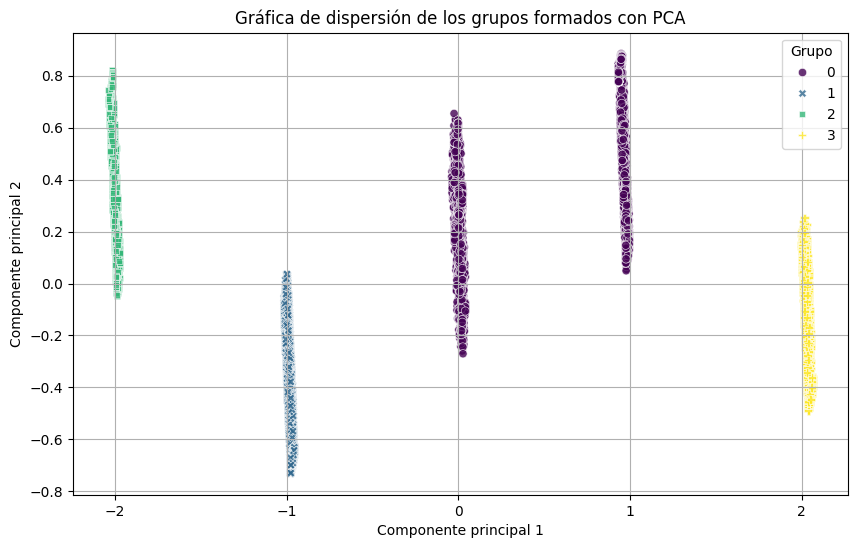

In [43]:
# Número óptimo de clusters determinado previamente
k_optimo = 4

# Aplicar K-means a los componentes principales
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Asegúrate de que principal_components sea el resultado de aplicar PCA con 4 componentes
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(4)])

# Añadir las etiquetas de los grupos al DataFrame de PCA
pca_df['Grupo'] = clusters

# Gráfica de dispersión de los grupos basada en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Grupo', data=pca_df, palette='viridis', alpha=0.8, style='Grupo')
plt.title('Gráfica de dispersión de los grupos formados con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()


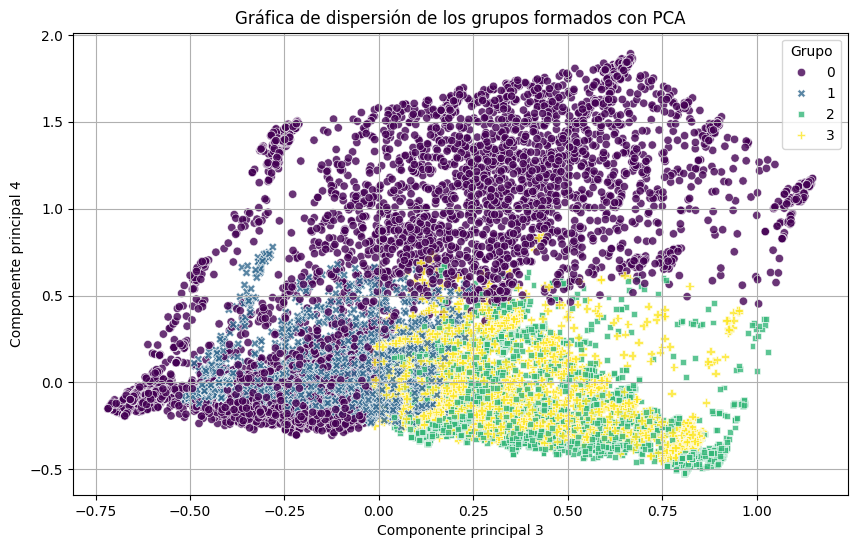

In [44]:
# Gráfica de dispersión de los grupos basada en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC3', y='PC4', hue='Grupo', data=pca_df, palette='viridis', alpha=0.8, style='Grupo')
plt.title('Gráfica de dispersión de los grupos formados con PCA')
plt.xlabel('Componente principal 3')
plt.ylabel('Componente principal 4')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()

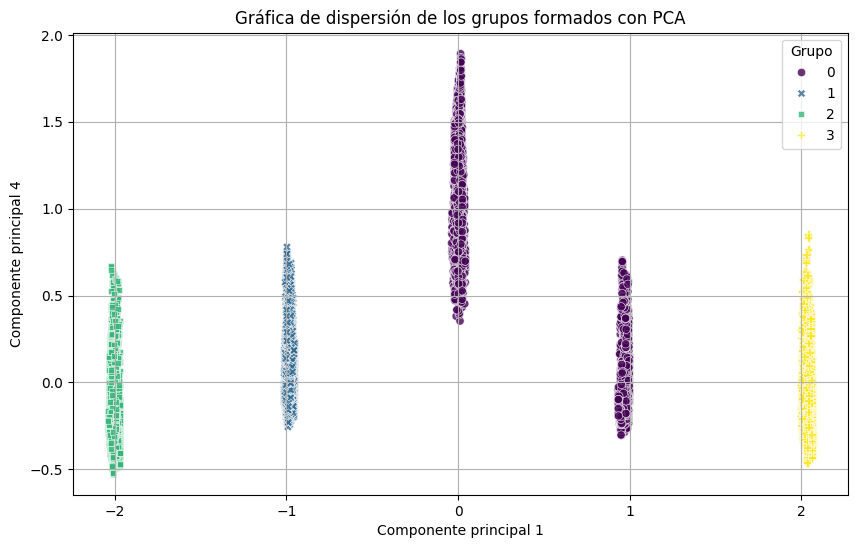

In [45]:
# Gráfica de dispersión de los grupos basada en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC4', hue='Grupo', data=pca_df, palette='viridis', alpha=0.8, style='Grupo')
plt.title('Gráfica de dispersión de los grupos formados con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 4')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()

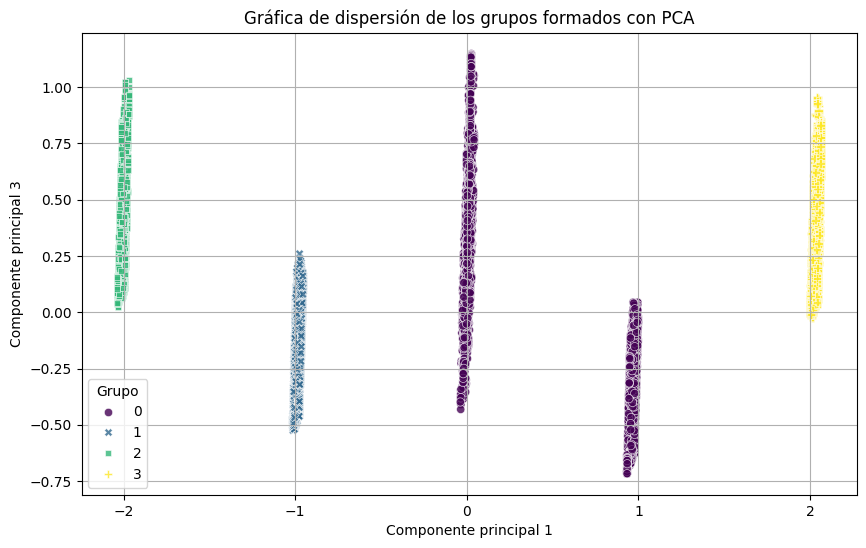

In [46]:
# Gráfica de dispersión de los grupos basada en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC3', hue='Grupo', data=pca_df, palette='viridis', alpha=0.8, style='Grupo')
plt.title('Gráfica de dispersión de los grupos formados con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 3')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()

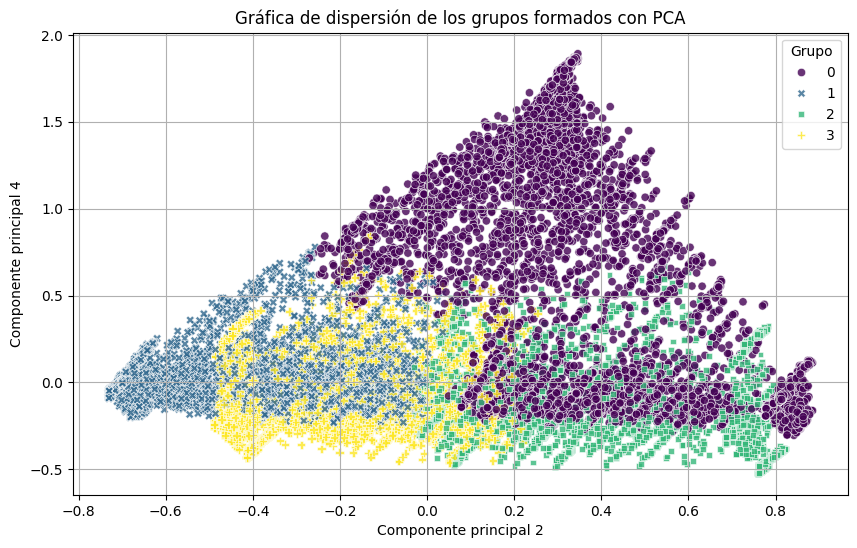

In [47]:
# Gráfica de dispersión de los grupos basada en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC2', y='PC4', hue='Grupo', data=pca_df, palette='viridis', alpha=0.8, style='Grupo')
plt.title('Gráfica de dispersión de los grupos formados con PCA')
plt.xlabel('Componente principal 2')
plt.ylabel('Componente principal 4')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()

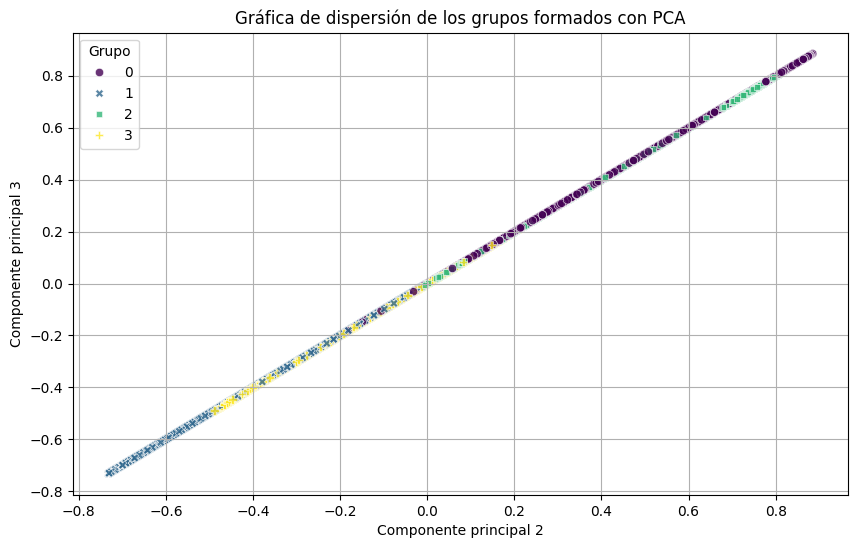

In [48]:
# Gráfica de dispersión de los grupos basada en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC2', y='PC2', hue='Grupo', data=pca_df, palette='viridis', alpha=0.8, style='Grupo')
plt.title('Gráfica de dispersión de los grupos formados con PCA')
plt.xlabel('Componente principal 2')
plt.ylabel('Componente principal 3')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()